# EDA and NLP Analysis on News Articles
This notebook focuses on the exploratory data analysis (EDA) of the cleaned news articles and applies natural language processing (NLP) techniques on the **title** and **description** fields to derive meaningful insights.


In [3]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from wordcloud import WordCloud

## Exploratory Data Analysis (EDA)

In this section, we perform EDA on the **training data**. The purpose is to better understand the structure of the dataset and uncover key patterns that will inform our later analysis. Our focus will be on the following fields:
- **Title**: The headline of each article.
- **Description**: A brief summary of the article.
- **Source**: The news outlet or publication that published the article.
- **Published Date**: The date on which the article was published.

In [8]:
# Load the training datasets
with open("dataset/train_harris.json", "r") as file:
    harris_train = json.load(file)

with open("dataset/train_trump.json", "r") as file:
    trump_train = json.load(file)

df_harris_train = pd.DataFrame(harris_train)
df_trump_train = pd.DataFrame(trump_train)

# Basic statistics
print("Number of Harris articles:", len(df_harris_train))
print("Number of Trump articles:", len(df_trump_train))

# Check for missing data in the title and description
print("\nMissing data in Harris articles:")
print(df_harris_train[["title", "description"]].isnull().sum())

print("Missing data in Trump articles:")
print(df_trump_train[["title", "description"]].isnull().sum())

Number of Harris articles: 367
Number of Trump articles: 321

Missing data in Harris articles:
title          0
description    0
dtype: int64
Missing data in Trump articles:
title          0
description    0
dtype: int64


### Distribution of Word Count

We calculate the word count for the **title** and **description** fields in both the **Trump** and **Harris** training datasets. Visualizing the distribution of word counts helps us understand the level of detail and the variability in the length of the articles' titles and descriptions.

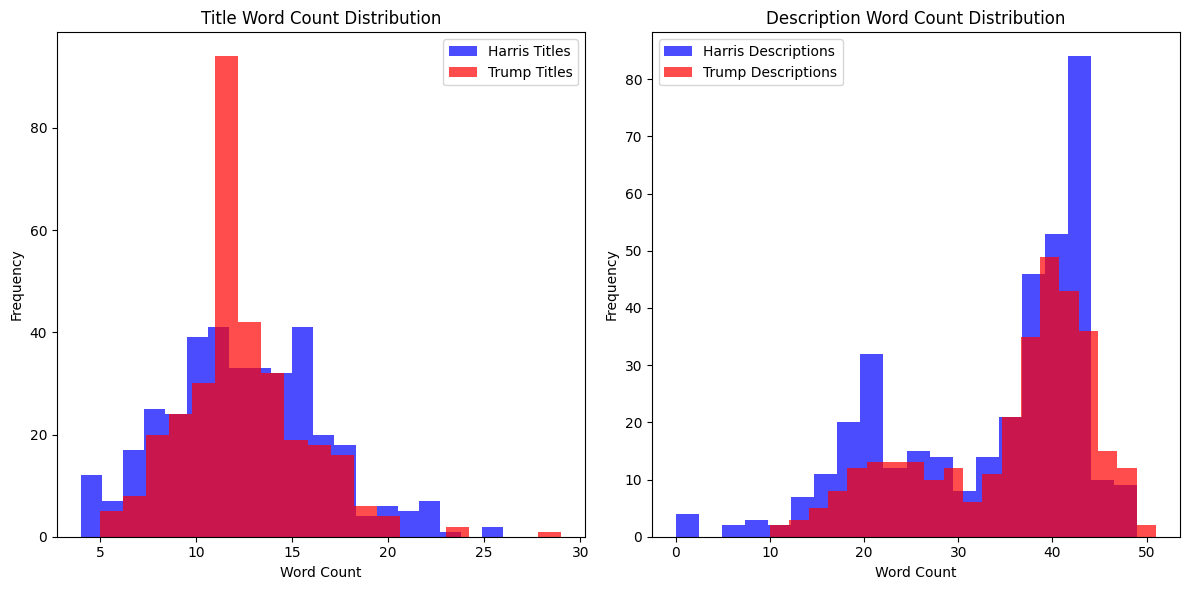

In [12]:
def calculate_word_count(text):
    if pd.notnull(text):
        return len(text.split())
    return 0


# Apply word count function to title and description columns
df_harris_train["title_word_count"] = df_harris_train["title"].apply(calculate_word_count)
df_harris_train["description_word_count"] = df_harris_train["description"].apply(calculate_word_count)

df_trump_train["title_word_count"] = df_trump_train["title"].apply(calculate_word_count)
df_trump_train["description_word_count"] = df_trump_train["description"].apply(calculate_word_count)

plt.figure(figsize=(12, 6))

# Title Word Count
plt.subplot(1, 2, 1)
plt.hist(df_harris_train["title_word_count"], bins=20, alpha=0.7, label="Harris Titles", color="blue")
plt.hist(df_trump_train["title_word_count"], bins=20, alpha=0.7, label="Trump Titles", color="red")
plt.title("Title Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.legend()

# Description Word Count
plt.subplot(1, 2, 2)
plt.hist(
    df_harris_train["description_word_count"],
    bins=20,
    alpha=0.7,
    label="Harris Descriptions",
    color="blue"
)
plt.hist(
    df_trump_train["description_word_count"],
    bins=20,
    alpha=0.7,
    label="Trump Descriptions",
    color="red"
)
plt.title("Description Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

### Top News Sources

We analyze the most frequent news sources in both the **Trump** and **Harris** datasets. Understanding which media outlets are publishing the most articles about each candidate gives us insights into potential biases or trends in media coverage.

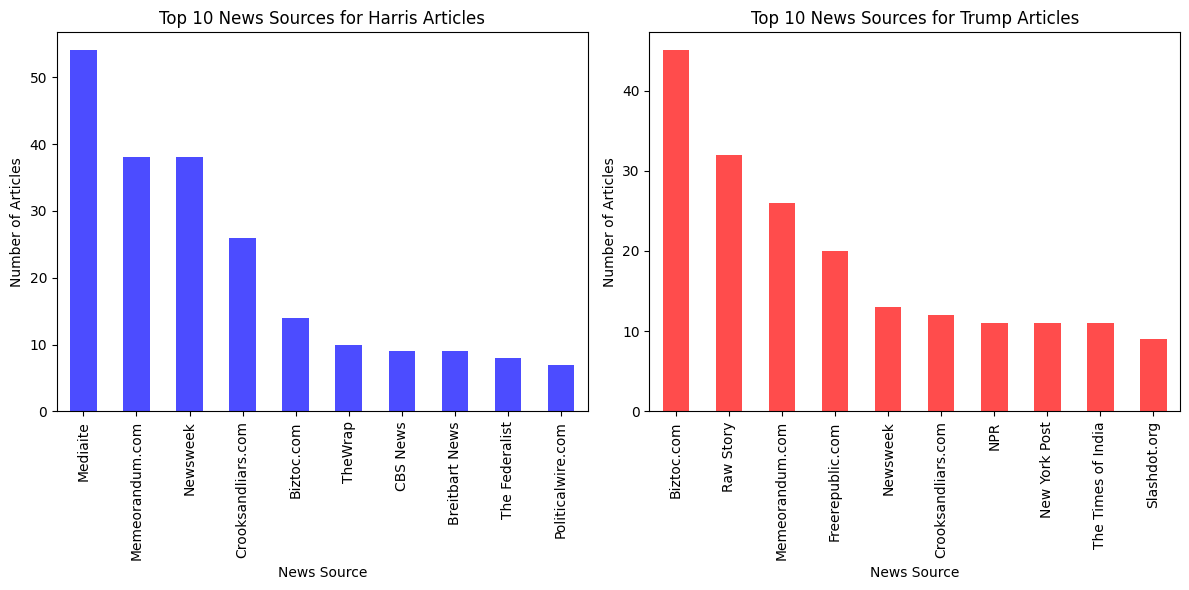

In [18]:
harris_sources = (
    df_harris_train["source"]
    .apply(lambda x: x["name"] if pd.notnull(x) and isinstance(x, dict) else "Unknown")
    .value_counts()
)
trump_sources = (
    df_trump_train["source"]
    .apply(lambda x: x["name"] if pd.notnull(x) and isinstance(x, dict) else "Unknown")
    .value_counts()
)

plt.figure(figsize=(12, 6))

# Harris articles - Top Sources
plt.subplot(1, 2, 1)
harris_sources.head(10).plot(kind="bar", color="blue", alpha=0.7)
plt.title("Top 10 News Sources for Harris Articles")
plt.xlabel("News Source")
plt.ylabel("Number of Articles")
plt.xticks(rotation=90)

# Trump articles - Top Sources
plt.subplot(1, 2, 2)
trump_sources.head(10).plot(kind="bar", color="red", alpha=0.7)
plt.title("Top 10 News Sources for Trump Articles")
plt.xlabel("News Source")
plt.ylabel("Number of Articles")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Publication Date Analysis

We analyze the publication dates of the articles to explore trends in media coverage over time. By visualizing the number of articles published about each candidate on a timeline, we can identify periods of increased or decreased media attention.

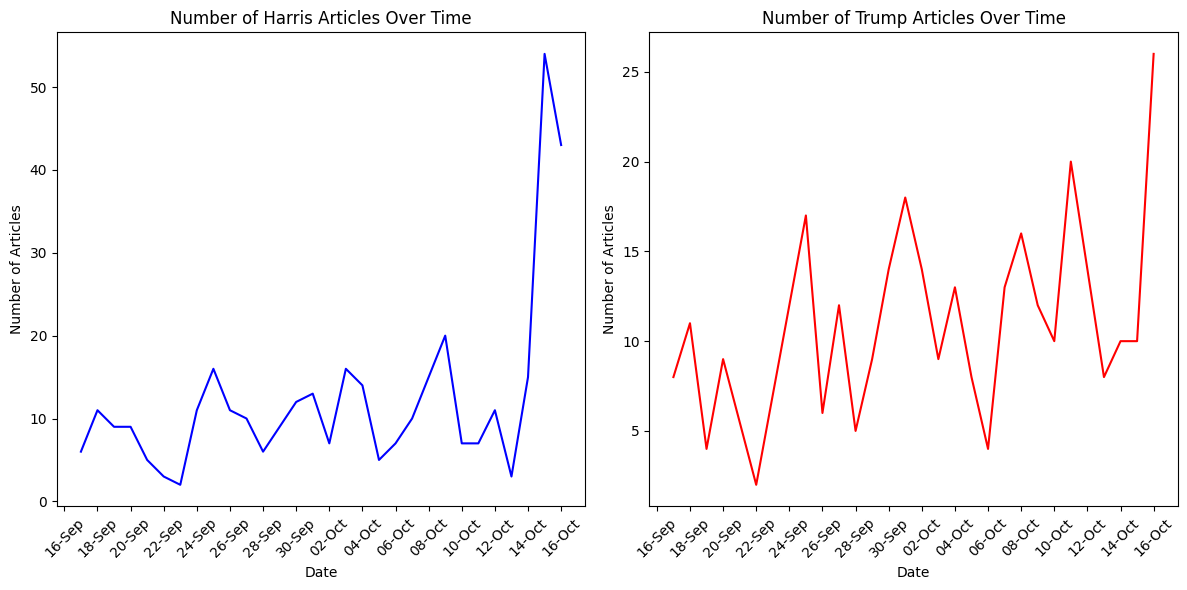

In [17]:
plt.figure(figsize=(12, 6))

# Harris articles over time
plt.subplot(1, 2, 1)
df_harris_train.groupby(df_harris_train["publishedAt"].dt.date).size().plot(
    kind="line", color="blue"
)
plt.title("Number of Harris Articles Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))  # Show every 2nd day
plt.gca().xaxis.set_major_formatter(
    mdates.DateFormatter("%d-%b")
)

# Trump articles over time
plt.subplot(1, 2, 2)
df_trump_train.groupby(df_trump_train["publishedAt"].dt.date).size().plot(
    kind="line", color="red"
)
plt.title("Number of Trump Articles Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))  # Show every 2nd day
plt.gca().xaxis.set_major_formatter(
    mdates.DateFormatter("%d-%b")
)
plt.tight_layout()
plt.show()

### Word Cloud of Common Words

We create word clouds based on the most frequently used words in the **title** and **description** fields combined for both the **Trump** and **Harris** articles. This gives us a visual representation of the common terms and themes in the articles related to each candidate.

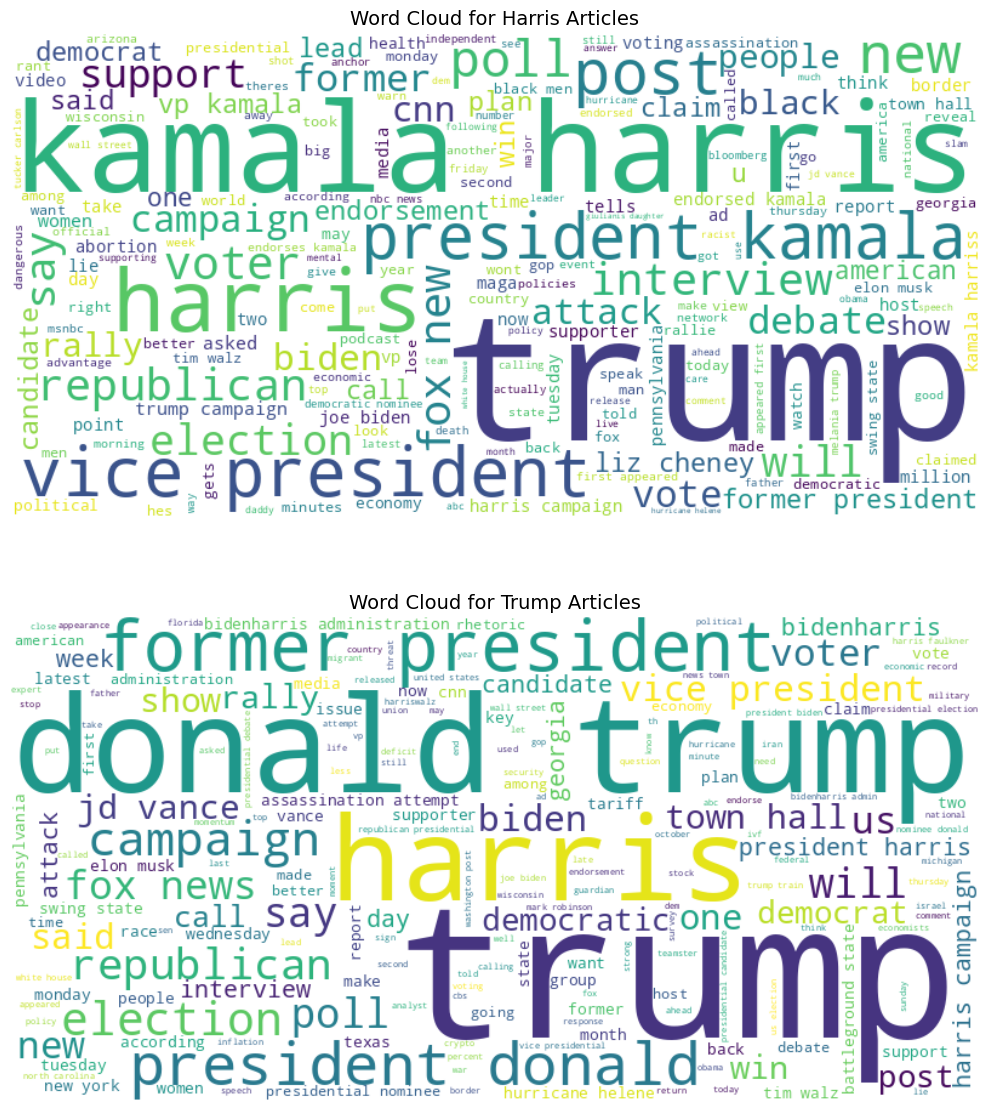

In [22]:
# Function to combine title and description text
def combine_text(dataframe):
    return " ".join(
        dataframe["title"].fillna("") + " " + dataframe["description"].fillna("")
    )


harris_combined_text = combine_text(df_harris_train)
harris_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(
    harris_combined_text
)

trump_combined_text = combine_text(df_trump_train)
trump_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(
    trump_combined_text
)

plt.figure(figsize=(10, 12))

# Harris word cloud
plt.subplot(2, 1, 1)
plt.imshow(harris_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Harris Articles", fontsize=14)

# Trump word cloud
plt.subplot(2, 1, 2)
plt.imshow(trump_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Trump Articles", fontsize=14)
plt.tight_layout()
plt.show()

## Sentiment Analysis - Setup

In this section, we begin by setting up the necessary tools for sentiment analysis using the **NLTK** library. We download relevant resources such as the **VADER lexicon**, **stopwords**, and tools for **tokenization** and **lemmatization**. 

We also load the **training** and **test** datasets for both **Trump** and **Harris** articles. The training data will be used to build our sentiment model, while the test data will be used for evaluation.

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download("vader_lexicon")
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()


def load_articles(train_or_test="train"):
    with open(f"dataset/{train_or_test}_harris.json", "r") as harris_file:
        harris_articles = json.load(harris_file)
    with open(f"dataset/{train_or_test}_trump.json", "r") as trump_file:
        trump_articles = json.load(trump_file)
    return harris_articles, trump_articles


# Load training data
harris_train_articles, trump_train_articles = load_articles("train")

# Load testing data
harris_test_articles, trump_test_articles = load_articles("test")
print(harris_train_articles)
print(harris_test_articles)

[{'source': {'id': 'breitbart-news', 'name': 'Breitbart News'}, 'author': 'Joel B. Pollak, Joel B. Pollak', 'title': 'fact check tim walz repeats lie about trump creating monitor for pregnancies', 'description': 'kamala harris and tim walz continue to repeat the lie that trump wants to create a federal abortion monitor or coordinator despite numerous factchecks not only by breitbart news but also byusa today and snopes the post fact check tim walz repeats', 'url': 'https://www.breitbart.com/politics/2024/09/18/fact-check-tim-walz-repeats-lie-about-trump-creating-monitor-for-pregnancies/', 'urlToImage': 'https://media.breitbart.com/media/2024/09/Tim-Walz-Associated-Press-1-640x335.jpg', 'publishedAt': '2024-09-18T13:04:22Z', 'content': 'CLAIM: “Trump is trying to create this new government entity that will monitor all pregnancies to enforce their abortion bans.”\r\nMinnesota Gov. Tim Walz, the Democratic nominee for vice president, sp… [+3618 chars]'}, {'source': {'id': 'newsweek', 'nam

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jaco/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /home/jaco/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jaco/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jaco/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jaco/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Sentiment Analysis - Processing Articles

In this step, we preprocess the text by removing common names (e.g., **Trump**, **Harris**) and applying **lemmatization** and **stopword removal** to clean the text. We then use the **VADER SentimentIntensityAnalyzer** to calculate sentiment scores for both the **title** and **description** fields of each article. The sentiment score is aggregated across sentences to produce a compound sentiment score for each article.

In [5]:
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download("punkt")

# Initialize SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()


def preprocess(text):
    text = text.lower()

    # Remove candidate names (more concise and generalized)
    text = re.sub(r"\b(kamala|harris|donald|trump|trumps)\b", "", text)

    # Tokenize and lemmatize words
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word.isalpha()]

    # Remove stopwords
    words = [word for word in words if word not in stop_words]

    return " ".join(words)


# Total sentiment score for an article (combined title + description)
def calculate_sentiment_for_article(article):
    sentences = sent_tokenize(article)
    total_score = 0

    for sentence in sentences:
        sentiment = sid.polarity_scores(sentence)
        total_score += sentiment["compound"]

    return total_score


def process_articles(articles, candidate_name):
    candidate_data = []

    for article in articles:
        title = article.get("title", "")
        description = article.get("description", "")
        published_at = article.get("publishedAt", "")

        if title or description:
            cleaned_title = preprocess(title)
            cleaned_description = preprocess(description)

            combined_text = cleaned_title + " " + cleaned_description

            total_score = calculate_sentiment_for_article(combined_text)

            candidate_data.append(
                {
                    "article": combined_text,
                    "candidate": candidate_name,
                    "score": total_score,
                    "publishedAt": published_at,
                }
            )

    return candidate_data


harris_data = process_articles(harris_train_articles, "Kamala Harris")
trump_data = process_articles(trump_train_articles, "Donald Trump")

df_harris_train = pd.DataFrame(harris_data)
df_trump_train = pd.DataFrame(trump_data)

# Save to CSV for analysis
df_harris_train.to_csv("dataset/train_harris_sentiment.csv", index=False)
df_trump_train.to_csv("dataset/train_trump_sentiment.csv", index=False)

[nltk_data] Downloading package punkt to /home/jaco/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
